In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
print("Setup Complete")

Setup Complete


In [2]:
# sets the path of the files to be analyzed to a variable
nflx_path = '../input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv'
con_path = '../input/continent/data_w_con.csv'

# reads files to a variable
nflx_data = pd.read_csv(nflx_path, index_col='Country_code')
con_data = pd.read_csv(con_path)

# returns the csv file in table form
nflx_data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Country_code,,,,,,,
ar,Argentina,4760,3154,1606,3.74,6.30,9.26
au,Australia,6114,4050,2064,7.84,12.12,16.39
at,Austria,5640,3779,1861,9.03,14.67,20.32
be,Belgium,4990,3374,1616,10.16,15.24,20.32
bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...
ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
us,United States,5818,3826,1992,8.99,13.99,17.99


<AxesSubplot:title={'center':'Relationship of Total Library Size to Cost of standard subscription per month ($)'}, xlabel='Total Library Size', ylabel='Cost Per Month - Standard ($)'>

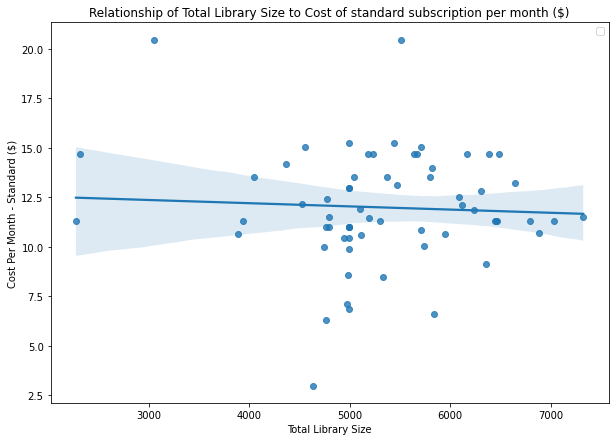

In [3]:
# SCATTERPLOT
plt.figure(figsize=(10,7))
plt.title('Relationship of Total Library Size to Cost of standard subscription per month ($)')
plt.legend()

sb.regplot(x=nflx_data['Total Library Size'], y=nflx_data['Cost Per Month - Standard ($)'])

Shown above is the relationship of a country's Netflix total library size (TV shows + movies) to the cost of their standard subscription per month (in US dollars). The visualization tool qualitatively shows a weak negative correlation between the two variables as evidenced by the gentle downwards slope.

**Based on available data, the monthly standard subscription cost for Netflix is somewhat seen to decrease as the total library size grow in volume.**

This weak correlation does not imply that cost is inversely proportional to library size.

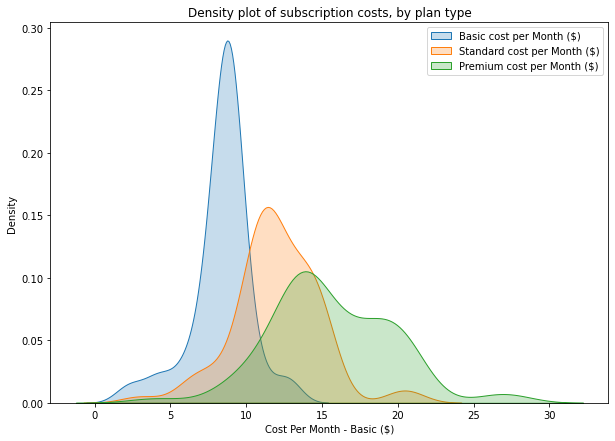

In [4]:
# KDE plot 
plt.figure(figsize=(10,7))

sb.kdeplot(data=nflx_data['Cost Per Month - Basic ($)'], label="Basic cost per Month ($)", shade=True)
sb.kdeplot(data=nflx_data['Cost Per Month - Standard ($)'], label="Standard cost per Month ($)", shade=True)
sb.kdeplot(data=nflx_data['Cost Per Month - Premium ($)'], label="Premium cost per Month ($)", shade=True)

plt.title("Density plot of subscription costs, by plan type")

plt.legend() # shows legend of each plot

From a surface-level look at the plot above, it can be seen that **most subscription costs, regardless of plan type, tend to hang around the 5 to 15 dollar range**. 

If the plan's subscription cost is less than 10 dollars, it is most likely a *Basic Subscription*.

If the plan costs about 10 to 15 dollars, it is likely a *Standard Subscription*.

If the plan costs more than 15 dollars, it is probably a *Premium Subscription*.

Lastly, it is worth noting that none of these subscription types are in a category of their own - meaning that **we cannot easily guess the type of Netflix plan one has solely on the monthly costs**.

The succeeding plots will be a comparison of subscription costs per Continent.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Swarmplot of Basic subscription cost per month, by Continent'}, xlabel='Continent', ylabel='Cost Per Month - Basic ($)'>

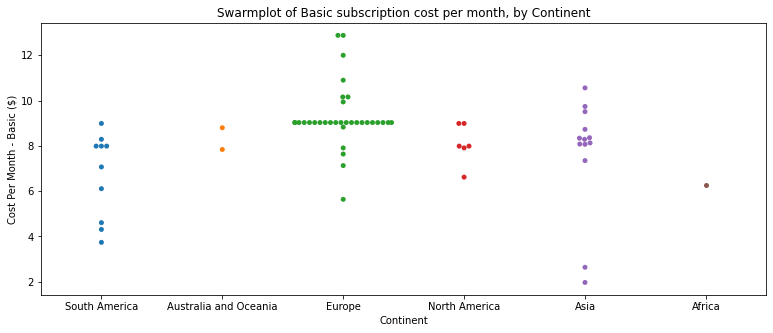

In [5]:
# SWARMPLOT - BASIC
plt.figure(figsize=(13,5))
plt.title("Swarmplot of Basic subscription cost per month, by Continent")
sb.swarmplot(x=con_data['Continent'], y=con_data['Cost Per Month - Basic ($)'])

<AxesSubplot:title={'center':'Swarmplot of Standard subscription cost per month, by Continent'}, xlabel='Continent', ylabel='Cost Per Month - Standard ($)'>

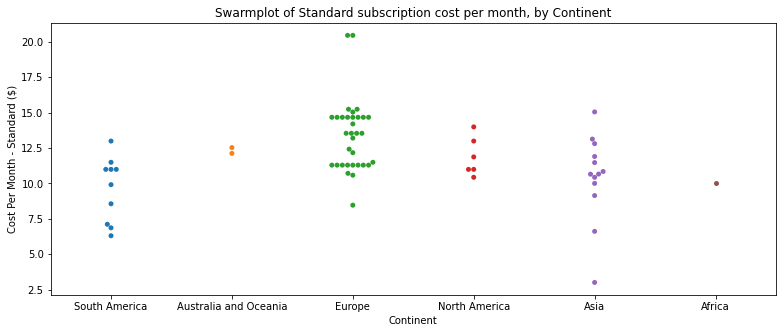

In [6]:
# SWARMPLOT - STANDARD
plt.figure(figsize=(13,5))
plt.title("Swarmplot of Standard subscription cost per month, by Continent")
sb.swarmplot(x=con_data['Continent'], y=con_data['Cost Per Month - Standard ($)'])

<AxesSubplot:title={'center':'Swarmplot of Premium subscription cost per month, by Continent'}, xlabel='Continent', ylabel='Cost Per Month - Premium ($)'>

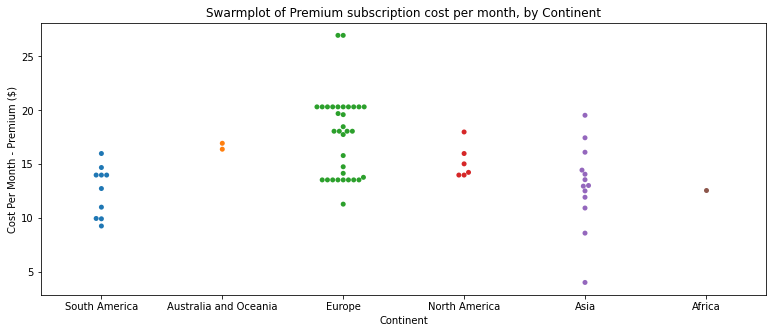

In [7]:
# SWARMPLOT - PREMIUM
plt.figure(figsize=(13,5))
plt.title("Swarmplot of Premium subscription cost per month, by Continent")
sb.swarmplot(x=con_data['Continent'], y=con_data['Cost Per Month - Premium ($)'])

From the three swarmplots, it can be noticed that through each pricepoints, **Europeans typically pay more compared to other continents**.

<AxesSubplot:title={'center':'Comparison of Total Library Size per Continent'}, xlabel='Continent', ylabel='Total Library Size'>

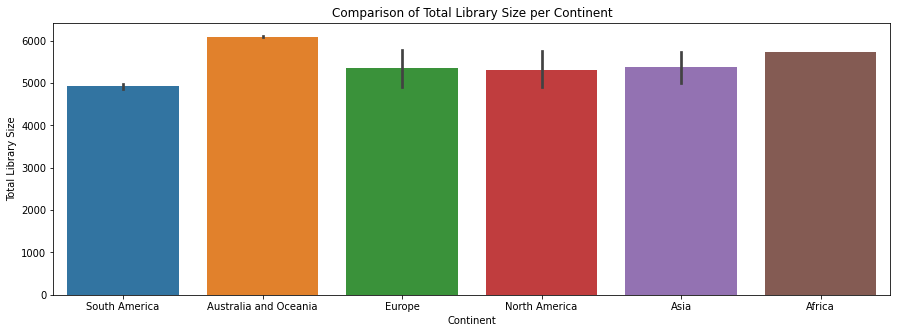

In [8]:
# BAR PLOT
plt.figure(figsize=(15,5))
plt.title("Comparison of Total Library Size per Continent")
sb.barplot(x=con_data['Continent'], y=con_data['Total Library Size'])

Despite being the highest payers among all continents, Europeans do not have access to the largest available total library size. Instead, **Australia and Oceania subscribers are afforded more content that anybody else.**